Average path length and clustering coefficient of Watts–Strogatz small-world graphs. 

Create a large Watts–Strogatz graph (n > 200, c > 4) for different values of p.

1. Calculate the average path length of the graph for each p and plot your results. Verify the theoretical approximations for small and large values of p, as shown in figure 12.6(a). Repeat for different values of n and c.
2. Calculate the clustering coefficient for p = 0 as a function of c and show that it matches the theoretical prediction, as shown in figure 12.6(b).

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm 

n = 300
c = 6
probabilities=np.logspace(-6, 0.99, 30)
averagePathLengths = []
clusteringCoeffList = []

boundary = c/2
adjMatrix = np.zeros((n, n))
for k in range(n):
    for l in range(n):
        if 1 <= np.absolute((k - l)%n) and np.absolute((l - k)%n) <= boundary:
            adjMatrix[k, l] = 1
            adjMatrix[l, k] = 1

ogAdjMatrix=adjMatrix

for i, p in enumerate(tqdm(probabilities)):
    randMatrix = np.random.uniform(low=0.0, high=1.0, size=(n, n))


    #rewiring
    for q in range(n):
        for s in range(q,n):
            if adjMatrix[q,s] == 1:
                if randMatrix[q,s] <= p:
                    zeroIndices = np.where(adjMatrix[q] == 0)[0]
                    index = np.random.choice(zeroIndices)
                    
                    randMatrix[q,index]=1
                    adjMatrix[q,s] = 0
                    adjMatrix[s,q] = 0
                    adjMatrix[q,index] = 1
                    adjMatrix[index,q] = 1

    pathMatrix = np.ones((n, n)) * (-1)
    q = 1
    offCount = n + 1
    while offCount > n:
        resMat = np.linalg.matrix_power(adjMatrix, q)
        
        for s in range(n):
            for t in range(s,n):
                if resMat[s, t] != 0 and pathMatrix[s, t] == -1 and pathMatrix[t, s] == -1 and s != t:
                    pathMatrix[s, t] = q
                    pathMatrix[t, s] = q

        offCount = np.count_nonzero(pathMatrix == -1)
        q += 1

    totalPathLength = np.sum(pathMatrix) + n
    averagePathLength = totalPathLength / (n * (n - 1))

    
    averagePathLengths.append(averagePathLength)
    
    cubeAdjMatrix = np.linalg.matrix_power(adjMatrix,3)
    nominator= np.trace(cubeAdjMatrix)
    degrees = np.sum(adjMatrix, axis=1, dtype='int')
    tmpFactor = [degree*(degree-1) for degree in degrees]
    denominator = np.sum(tmpFactor)

    clusteringCoeff = nominator/denominator
    clusteringCoeffList.append(clusteringCoeff)

    adjMatrix = ogAdjMatrix



 83%|████████▎ | 25/30 [00:16<00:00,  6.10it/s]/opt/homebrew/anaconda3/lib/python3.10/site-packages/numpy/linalg/linalg.py:668: RuntimeWarning: invalid value encountered in matmul
  z = a if z is None else fmatmul(z, z)
100%|██████████| 30/30 [02:46<00:00,  5.57s/it]


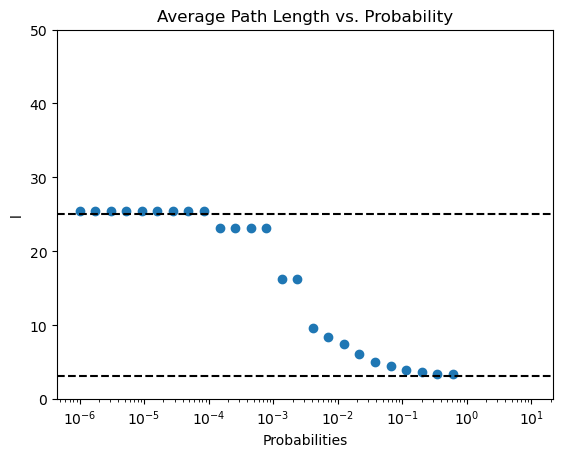

In [61]:
l1 = n / (2 * c)
l2 = np.log(n) / np.log(c)

plt.semilogx(probabilities, averagePathLengths, marker='o', linestyle='None', label='Average Path Length')
plt.axhline(y=l1, color='k', linestyle='--', label=r'$l \approx \frac{n}{2c}$')
plt.axhline(y=l2, color='k', linestyle='--', label=r'$l \approx \frac{\ln(n)}{\ln(c)}$')

plt.title('Average Path Length vs. Probability')
plt.xlabel('Probabilities')
plt.ylabel('l')
plt.ylim([0,50])
plt.show()

In [75]:
clusteringCoeff = 0
n = 20
parameterC = np.array([2,4,6,8,10,12,14,16,18,20,22,24])
p = 0
clusteringCoeffList1 = []


for j, c in enumerate(tqdm(parameterC)):
    boundary = c/2
    adjMatrix = np.zeros((n, n))
    for k in range(n):
        for l in range(n):
            if 1 <= np.absolute((k - l)%n) and np.absolute((l - k)%n) <= boundary:
                adjMatrix[k, l] = 1
                adjMatrix[l, k] = 1

    randMatrix = np.random.uniform(low=0.0, high=1.0, size=(n, n))


    #rewiring
    for q in range(n):
        for s in range(q,n):
            if adjMatrix[q,s] == 1:
                if randMatrix[q,s] <= p:
                    zeroIndices = np.where(adjMatrix[q] == 0)[0]
                    index = np.random.choice(zeroIndices)
                    randMatrix[q,index]=1
                    adjMatrix[q,s] = 0
                    adjMatrix[s,q] = 0
                    adjMatrix[q,index] = 1
                    adjMatrix[index,q] = 1

    pathMatrix = np.ones((n, n)) * (-1)
    q = 1
    offCount = n + 1
    while offCount > n:
        resMat = np.linalg.matrix_power(adjMatrix, q)
        
        for s in range(n):
            for t in range(s,n):
                if resMat[s, t] != 0 and pathMatrix[s, t] == -1 and pathMatrix[t, s] == -1 and s != t:
                    pathMatrix[s, t] = q
                    pathMatrix[t, s] = q

        offCount = np.count_nonzero(pathMatrix == -1)
        q += 1
    
    cubeAdjMatrix = np.linalg.matrix_power(adjMatrix,3)
    nominator= np.trace(cubeAdjMatrix)
    degrees = np.sum(adjMatrix, axis=1, dtype='int')
    tmpFactor = [degree*(degree-1) for degree in degrees]
    denominator = np.sum(tmpFactor)

    clusteringCoeff = nominator/denominator
    clusteringCoeffList1.append(clusteringCoeff)




100%|██████████| 12/12 [00:00<00:00, 1051.45it/s]


In [63]:
clusteringCoeff = 0
n = 1000
parameterC2=np.array([200,300,400,500,600,700,800,900,1000])
parameterC2 = np.concatenate((parameterC,parameterC2))
p = 0
clusteringCoeffList2 = []


for j, c in enumerate(tqdm(parameterC2)):
    boundary = c/2
    adjMatrix = np.zeros((n, n))
    for k in range(n):
        for l in range(n):
            if 1 <= np.absolute((k - l)%n) and np.absolute((l - k)%n) <= boundary:
                adjMatrix[k, l] = 1
                adjMatrix[l, k] = 1

    randMatrix = np.random.uniform(low=0.0, high=1.0, size=(n, n))


    #rewiring
    for q in range(n):
        for s in range(q,n):
            if adjMatrix[q,s] == 1:
                if randMatrix[q,s] <= p:
                    zeroIndices = np.where(adjMatrix[q] == 0)[0]
                    index = np.random.choice(zeroIndices)
                    
                    randMatrix[q,index]=1
                    adjMatrix[q,s] = 0
                    adjMatrix[s,q] = 0
                    adjMatrix[q,index] = 1
                    adjMatrix[index,q] = 1

    pathMatrix = np.ones((n, n)) * (-1)
    q = 1
    offCount = n + 1
    while offCount > n:
        resMat = np.linalg.matrix_power(adjMatrix, q)
        
        for s in range(n):
            for t in range(s,n):
                if resMat[s, t] != 0 and pathMatrix[s, t] == -1 and pathMatrix[t, s] == -1 and s != t:
                    pathMatrix[s, t] = q
                    pathMatrix[t, s] = q

        offCount = np.count_nonzero(pathMatrix == -1)
        q += 1
    
    cubeAdjMatrix = np.linalg.matrix_power(adjMatrix,3)
    nominator= np.trace(cubeAdjMatrix)
    degrees = np.sum(adjMatrix, axis=1, dtype='int')
    tmpFactor = [degree*(degree-1) for degree in degrees]
    denominator = np.sum(tmpFactor)

    clusteringCoeff = nominator/denominator
    clusteringCoeffList2.append(clusteringCoeff)


100%|██████████| 27/27 [09:24<00:00, 20.90s/it]  


TypeError: 'Axes' object is not subscriptable

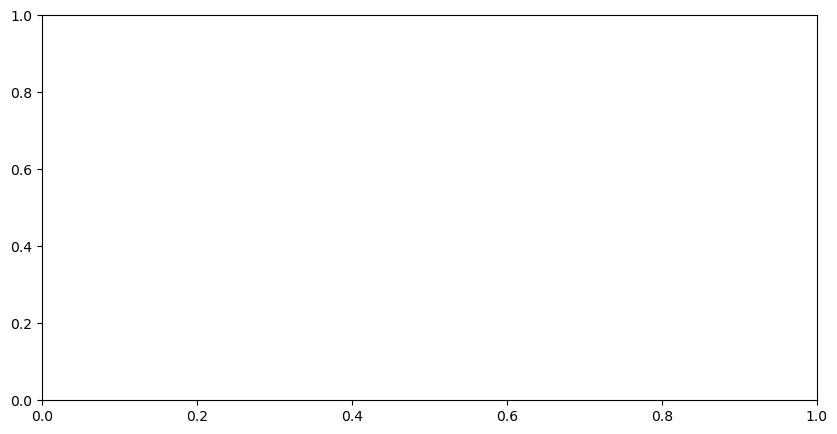

In [79]:

fig, ax = plt.subplots(1,2, figsize=(10,5))
line = np.logspace(np.log10(2),3,100)

theoretical_coefficients = (3*(line - 2)) / (4*(line - 1))
ax[0].semilogx(line, theoretical_coefficients,'--',label="Theoretical")
# ax[0].semilogx(parameterC, clusteringCoeffList1[:], 'o', label="Numerical, n = {}".format(50))
# ax[0].semilogx(parameterC2, clusteringCoeffList2[:], 'o', label="Numerical, n = {}".format(1000))
ax[0].semilogx(parameterC, clusteringCoeffList1[:], 'o', label="Numerical, n = {}".format(50), markersize=5)
ax[0].semilogx(parameterC2, clusteringCoeffList2[:], 'o', label="Numerical, n = {}".format(1000), markersize=4)


ax[1].set_xlabel("$c$")
ax[1].set_ylabel("$C$")
ax[1].set_title("Clustering coefficient")
ax[1].set_ylim(0,1)

plt.show()

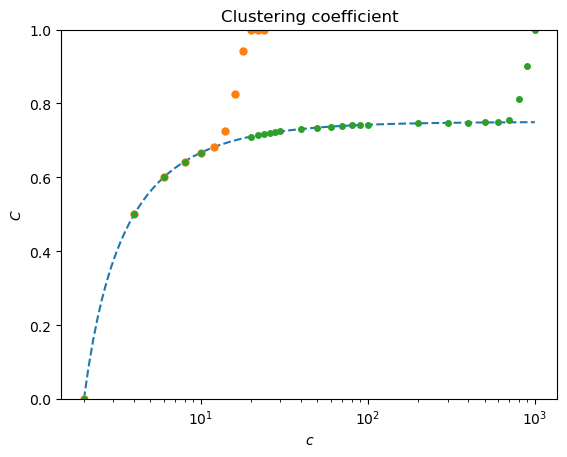

In [81]:
line = np.logspace(np.log10(2),3,100)

theoretical_coefficients = (3*(line - 2)) / (4*(line - 1))
plt.semilogx(line, theoretical_coefficients,'--',label="Theoretical")
# ax[0].semilogx(parameterC, clusteringCoeffList1[:], 'o', label="Numerical, n = {}".format(50))
# ax[0].semilogx(parameterC2, clusteringCoeffList2[:], 'o', label="Numerical, n = {}".format(1000))
plt.semilogx(parameterC, clusteringCoeffList1[:], 'o', label="Numerical, n = {}".format(50), markersize=5)
plt.semilogx(parameterC2, clusteringCoeffList2[:], 'o', label="Numerical, n = {}".format(1000), markersize=4)


plt.xlabel("$c$")
plt.ylabel("$C$")
plt.title("Clustering coefficient")
plt.ylim(0,1)

plt.show()